In [1]:
import pandas as pd
import os
import matplotlib as plt

In [2]:
df1 = pd.read_csv('p1.csv', index_col=0)
df2 = pd.read_csv('p2.csv', index_col=0)
df3 = pd.read_csv('p3.csv', index_col=0)
df4 = pd.read_csv('p4.csv', index_col=0)
df5 = pd.read_csv('p5.csv', index_col=0)
df6 = pd.read_csv('p6.csv', index_col=0)
df7 = pd.read_csv('p7.csv', index_col=0)
df8 = pd.read_csv('p8.csv', index_col=0)

In [4]:
all_parts = {}

In [5]:
df1['Emotion'].value_counts(normalize=True) * 100

anger       58.336731
joy         28.862617
sadness      8.560946
fear         3.098247
love         0.937627
surprise     0.203832
Name: Emotion, dtype: float64

In [6]:
df1_values = df1['Emotion'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='counts')
df1_values['counts'] = df1_values['counts'] * 100    # not possible in creation of df because only value counts need to be multiplied by 100 (?)

In [7]:
df1_values.head()
# df1_values.plot(kind='bar')


,unique_values,counts
0,anger,58.336731
1,joy,28.862617
2,sadness,8.560946
3,fear,3.098247
4,love,0.937627


In [48]:
# reformat values to fit into barchart

emotions = {'anger': {}, 'joy': {}, 'sadness': {}, 'fear': {}, 'love': {}}

def reformat(file, fname):
    anger = file['Emotion'].value_counts(normalize=True)['anger'] * 100
    joy = file['Emotion'].value_counts(normalize=True)['joy'] * 100
    sadness = file['Emotion'].value_counts(normalize=True)['sadness'] * 100
    fear = file['Emotion'].value_counts(normalize=True)['fear'] * 100
    love = file['Emotion'].value_counts(normalize=True)['love'] * 100

    emotions['anger']['Part ' + str(fname)] = anger
    emotions['joy']['Part ' + str(fname)] = joy
    emotions['sadness']['Part ' + str(fname)] = sadness
    emotions['fear']['Part ' + str(fname)] = fear
    emotions['love']['Part ' + str(fname)] = love

reformat(df1, 1)
reformat(df2, 2)
reformat(df3, 3)
reformat(df4, 4)
reformat(df5, 5)
reformat(df6, 6)
reformat(df7, 7)
reformat(df8, 8)

print(emotions)

{'anger': {'Part 1': 58.33673053403995, 'Part 2': 59.352517985611506, 'Part 3': 56.31460674157304, 'Part 4': 58.80322209436134, 'Part 5': 57.25806451612904, 'Part 6': 57.32586068855085, 'Part 7': 61.61616161616161, 'Part 8': 58.06451612903226}, 'joy': {'Part 1': 28.862617203424378, 'Part 2': 27.33812949640288, 'Part 3': 30.112359550561795, 'Part 4': 27.445339470655927, 'Part 5': 26.433691756272403, 'Part 6': 30.704563650920736, 'Part 7': 24.012855831037648, 'Part 8': 29.34443288241415}, 'sadness': {'Part 1': 8.560945780676722, 'Part 2': 8.673061550759392, 'Part 3': 11.01123595505618, 'Part 4': 9.781357882623706, 'Part 5': 11.783154121863799, 'Part 6': 8.726981585268215, 'Part 7': 8.999081726354454, 'Part 8': 9.053069719042664}, 'fear': {'Part 1': 3.0982470444353853, 'Part 2': 3.8768984812150276, 'Part 3': 2.0674157303370784, 'Part 4': 2.934407364787112, 'Part 5': 3.2706093189964163, 'Part 6': 2.6421136909527623, 'Part 7': 4.224058769513315, 'Part 8': 3.0176899063475546}, 'love': {'Part

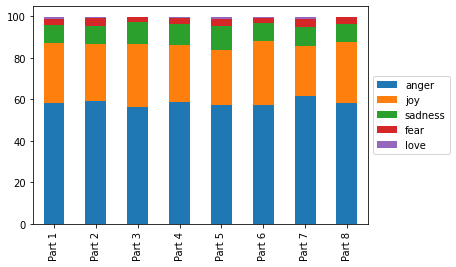

In [54]:
df_chart = pd.DataFrame(emotions)
df_chart.plot(kind='bar', stacked=True, legend='reverse').legend(loc='center left', bbox_to_anchor=(1, 0.5))

AttributeError: 'DataFrame' object has no attribute 'get_position'

In [25]:
all_parts = {}

def graph(part, name):
    all_parts['Part ' + str(name)] = part

    
all_parts['Part 1'] = df1_values
# graph(df1_values, 1)
# graph(df2_values, 2)
 
print(all_parts)


# pd.DataFrame(all_parts)

{'Part 1':   unique_values     counts
0         anger  58.336731
1           joy  28.862617
2       sadness   8.560946
3          fear   3.098247
4          love   0.937627
5      surprise   0.203832}


{'Part 1': {'Moscow': 37, 'St. Petersburg': 32, 'Pokrovskoe': 2, 'Vozdvizhenskoe': 0}, 'Part 2': {'Moscow': 21, 'St. Petersburg': 13, 'Pokrovskoe': 0, 'Vozdvizhenskoe': 0}, 'Part 3': {'Moscow': 10, 'St. Petersburg': 14, 'Pokrovskoe': 4, 'Vozdvizhenskoe': 0}, 'Part 4': {'Moscow': 13, 'St. Petersburg': 11, 'Pokrovskoe': 0, 'Vozdvizhenskoe': 0}, 'Part 5': {'Moscow': 20, 'St. Petersburg': 23, 'Pokrovskoe': 0, 'Vozdvizhenskoe': 0}, 'Part 6': {'Moscow': 20, 'St. Petersburg': 10, 'Pokrovskoe': 2, 'Vozdvizhenskoe': 5}, 'Part 7': {'Moscow': 40, 'St. Petersburg': 23, 'Pokrovskoe': 0, 'Vozdvizhenskoe': 3}, 'Part 8': {'Moscow': 12, 'St. Petersburg': 1, 'Pokrovskoe': 3, 'Vozdvizhenskoe': 0}}


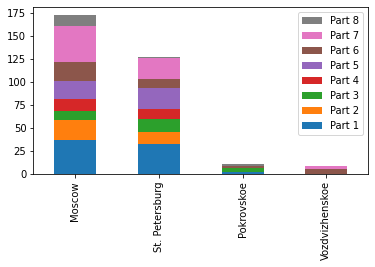

In [34]:
import os
import re
from matplotlib import pyplot as plt
import pandas as pd

with open(os.path.join('..', 'text', 'lemmatized', 'ak_complete_lem.txt'), 'r', encoding='utf-8') as file:
    ak_complete_lem = file.read()

with open(os.path.join('..', 'text', 'lemmatized', 'ak_p1_lem.txt'), 'r', encoding='utf-8') as file:
    ak_p1_lem = file.read()

with open(os.path.join('..', 'text', 'lemmatized', 'ak_p2_lem.txt'), 'r', encoding='utf-8') as file:
    ak_p2_lem = file.read()

with open(os.path.join('..', 'text', 'lemmatized', 'ak_p3_lem.txt'), 'r', encoding='utf-8') as file:
    ak_p3_lem = file.read()

with open(os.path.join('..', 'text', 'lemmatized', 'ak_p4_lem.txt'), 'r', encoding='utf-8') as file:
    ak_p4_lem = file.read()

with open(os.path.join('..', 'text', 'lemmatized', 'ak_p5_lem.txt'), 'r', encoding='utf-8') as file:
    ak_p5_lem = file.read()

with open(os.path.join('..', 'text', 'lemmatized', 'ak_p6_lem.txt'), 'r', encoding='utf-8') as file:
    ak_p6_lem = file.read()

with open(os.path.join('..', 'text', 'lemmatized', 'ak_p7_lem.txt'), 'r', encoding='utf-8') as file:
    ak_p7_lem = file.read()

with open(os.path.join('..', 'text', 'lemmatized', 'ak_p8_lem.txt'), 'r', encoding='utf-8') as file:
    ak_p8_lem = file.read()

all_parts_2 = {}


def location_count(part, name):
    def occurrences(word):
        return sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(word), part))
        # (efficient code to count occurrences of a word in a long string by user "Amber" on StackOverflow)

    places = {}

    places['Moscow'] = occurrences('moscow')
    places['St. Petersburg'] = occurrences('petersburg')
    places['Pokrovskoe'] = occurrences('pokrovskoe')
    places['Vozdvizhenskoe'] = occurrences('vozdvizhenskoe')

    all_parts_2['Part ' + str(name)] = places


location_count(ak_p1_lem, 1)
location_count(ak_p2_lem, 2)
location_count(ak_p3_lem, 3)
location_count(ak_p4_lem, 4)
location_count(ak_p5_lem, 5)
location_count(ak_p6_lem, 6)
location_count(ak_p7_lem, 7)
location_count(ak_p8_lem, 8)

df = pd.DataFrame(all_parts_2)
df.plot(kind='bar', stacked=True, legend='reverse')
plt.gcf().subplots_adjust(bottom=0.3)  # prevents cut-off of x labels

plt.savefig('locations.png', dpi=400, bbox_inches='tight')


print(all_parts_2)



In [10]:
print(all_parts_2)

{'Part 1': {'Moscow': 37, 'St. Petersburg': 32, 'Pokrovskoe': 2, 'Vozdvizhenskoe': 0}, 'Part 2': {'Moscow': 21, 'St. Petersburg': 13, 'Pokrovskoe': 0, 'Vozdvizhenskoe': 0}, 'Part 3': {'Moscow': 10, 'St. Petersburg': 14, 'Pokrovskoe': 4, 'Vozdvizhenskoe': 0}, 'Part 4': {'Moscow': 13, 'St. Petersburg': 11, 'Pokrovskoe': 0, 'Vozdvizhenskoe': 0}, 'Part 5': {'Moscow': 20, 'St. Petersburg': 23, 'Pokrovskoe': 0, 'Vozdvizhenskoe': 0}, 'Part 6': {'Moscow': 20, 'St. Petersburg': 10, 'Pokrovskoe': 2, 'Vozdvizhenskoe': 5}, 'Part 7': {'Moscow': 40, 'St. Petersburg': 23, 'Pokrovskoe': 0, 'Vozdvizhenskoe': 3}, 'Part 8': {'Moscow': 12, 'St. Petersburg': 1, 'Pokrovskoe': 3, 'Vozdvizhenskoe': 0}}


In [11]:
df2['Emotion'].value_counts()

anger       1485
joy          684
sadness      217
fear          97
love          15
surprise       4
Name: Emotion, dtype: int64

In [12]:
df2_values = df2['Emotion'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='counts')

In [13]:
df2_values.head()

,unique_values,counts
0,anger,0.593525
1,joy,0.273381
2,sadness,0.086731
3,fear,0.038769
4,love,0.005995


In [14]:
df2_values['counts'] = df2_values['counts'] * 100    # not possible in creation of df because only value counts need to be multiplied by 100 (?)

In [15]:
df2_values.head()

,unique_values,counts
0,anger,59.352518
1,joy,27.338129
2,sadness,8.673062
3,fear,3.876898
4,love,0.599520


<AxesSubplot:>

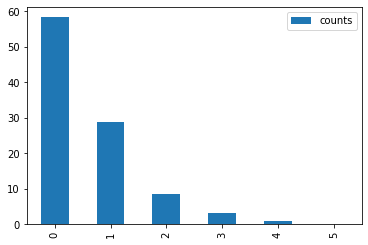

In [16]:
df1_values.plot(kind='bar', stacked=True, legend='reverse')

In [28]:
all_parts = {}
all_parts['Part One'] = df1_values
all_parts['Part Two'] = df2_values
print(all_parts)

{'Part One':   unique_values     counts
0         anger  58.336731
1           joy  28.862617
2       sadness   8.560946
3          fear   3.098247
4          love   0.937627
5      surprise   0.203832, 'Part Two':   unique_values     counts
0         anger  59.352518
1           joy  27.338129
2       sadness   8.673062
3          fear   3.876898
4          love   0.599520
5      surprise   0.159872}


In [29]:
pd.DataFrame(df1_values)

,unique_values,counts
0,anger,58.336731
1,joy,28.862617
2,sadness,8.560946
3,fear,3.098247
4,love,0.937627
5,surprise,0.203832


In [33]:
df_all_parts = pd.DataFrame([all_parts])
# all_parts.plot(kind='bar', stacked=True, legend='reverse')
print(df_all_parts)

                                            Part One  \
0    unique_values     counts
0         anger  58...   

                                            Part Two  
0    unique_values     counts
0         anger  59...  


In [ ]:
df3['Emotion'].value_counts()

In [19]:
df4['Emotion'].value_counts()

anger       1022
joy          477
sadness      170
fear          51
love          13
surprise       5
Name: Emotion, dtype: int64

In [20]:
df5['Emotion'].value_counts()

anger       1278
joy          590
sadness      263
fear          73
love          24
surprise       4
Name: Emotion, dtype: int64

In [21]:
df6['Emotion'].value_counts()

anger       1432
joy          767
sadness      218
fear          66
love          11
surprise       4
Name: Emotion, dtype: int64

In [22]:
df7['Emotion'].value_counts()

anger       1342
joy          523
sadness      196
fear          92
love          16
surprise       9
Name: Emotion, dtype: int64

In [23]:
df8['Emotion'].value_counts()

anger       558
joy         282
sadness      87
fear         29
love          3
surprise      2
Name: Emotion, dtype: int64

In [24]:
df1_percentage = df1['Emotion'].value_counts